In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils.label_map_util import create_category_index_from_labelmap
import numpy as np
%matplotlib inline

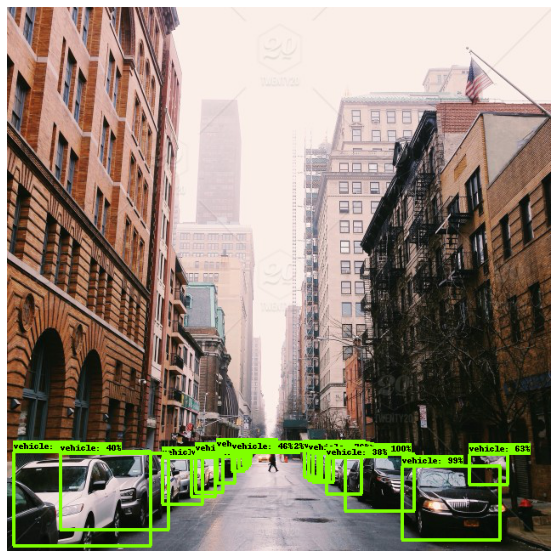

In [3]:
#load model and categories
detection_fn = tf.saved_model.load("experiments/rcnnAug2/exported/saved_model")
category_index = create_category_index_from_labelmap("label_map.pbtxt",
                                                         use_display_name=True)

#Open Image (convert to 640x640 rgb if needed)
im = Image.open("images/stock-photo-city.jpg")

#Convert Image to Array
im_array = np.asarray(im).astype(np.uint8)
im_tensor = tf.convert_to_tensor([im_array],dtype=tf.uint8)

#Use Model to find bounding boxes
detections  = detection_fn(im_tensor )

# tensor -> numpy arr, remove one dimensions
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, ...].numpy()
for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

#Create Image with boxes
image_np_with_detections = \
            viz_utils.visualize_boxes_and_labels_on_image_array(
                im_array,
                detections['detection_boxes'],
                detections['detection_classes'],
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=.30,
                agnostic_mode=False)

#DrawImage
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(Image.fromarray(image_np_with_detections))
plt.show()
